<a href="https://colab.research.google.com/github/Rezvanpm/EngMathematicsFourier/blob/main/FourierSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

نصب کتابخانه های مورد نیاز

In [ ]:
!pip install soundfile #خواندن و نوشتن فایل های صوتی
!pip install pydub # پردازش و ویرایش فایل های صوتی
!pip install numpy # انجام عملیات های ریاضی و عددی
!pip install IPython # نمایش و پخش فایل های صوتی در محیط نوت بوک
!pip install matplotlib # تولید و رسم نمودار ها و تصاویر مصور
!pip install scipy # عملیات علمی و ریاضی پیشرفته
!pip install plotly==5.15.0 #visualization
!pip install bokeh #visualization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pydub-0.25.1-py2.py3-none-any.whl (32 kB)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 84.2 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1
Looking in ind

In [ ]:
#دریافت فایل صوتی از یک url
!pip install requests
# خواندن یک فایل صوتی
!pip install soundfile
!pip install pydub

!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


حال میخواهیم فایل صوتی مدنظرمان رو از ورودی خوانده و سپس پخش کنیم:

In [ ]:
from pydub import AudioSegment
from IPython.display import Audio

file_path = '/content/harvard.wav'

def play_audio(file_path):
    audio = AudioSegment.from_file(file_path)
    data = audio.export(format='wav').read()
    samplerate = audio.frame_rate
    return Audio(data, rate=samplerate)

# پخش فایل صوتی
audio_widget = play_audio(file_path)
audio_widget

خواندن یک فایل صوتی و نمایش اطلاعات آن

In [ ]:
from scipy.io import wavfile # for scientific and signal processing
from matplotlib import pyplot as plt #for visualization
import numpy as np # for array processing


# Load the data and calculate the time of each sample
samplerate, data = wavfile.read('harvard.wav')

print('Sample rate of the signal:',samplerate,"Hz")
# print('Contents of the signal:',data)
print('Length of the signal:',len(data)) #length to sample count
print('Length of the signal:',len(data) / samplerate) #length to seconds

Sample rate of the signal: 44100 Hz
Length of the signal: 809508
Length of the signal: 18.356190476190477


<ipython-input-5-386615ad2c82>:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read('harvard.wav')


<ipython-input-6-62a9adc1c60a>:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read('/content/harvard.wav')


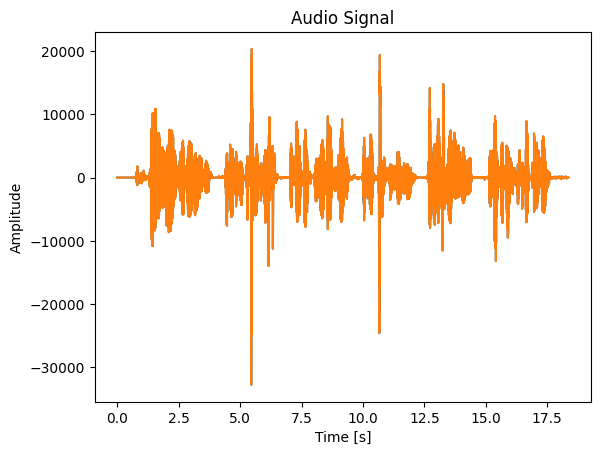

In [ ]:
from scipy.io import wavfile
from matplotlib import pyplot as plt

# Load the data and calculate the time of each sample
samplerate, data = wavfile.read('/content/harvard.wav')

# Calculate the duration of the signal
duration = len(data) / samplerate

# Create an array of time values for x-axis
time = np.linspace(0., duration, len(data))

# Plot the signal
plt.plot(time, data)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Audio Signal')
plt.show()

# Set the axis range
 # plt.ylim(0, 100)
 # plt.xlim(0, 10)


رسم با استفاده از کتابخانه plotly

In [ ]:
import plotly.graph_objects as go

# Create trace
trace = go.Scatter(
    x=new_times,
    y=new_data,
    mode='lines',
    name='Waveform'
)

# Create layout
layout = go.Layout(
    xaxis=dict(title='Time (s)'),
    yaxis=dict(title='Amplitude'),
    title='Waveform of the audio'
)

# Create figure
fig = go.Figure(data=[trace], layout=layout)

# Show figure
fig.show()


NameError: ignored

رسم با کتابخانه های librosa and matplotlib


---
دامنه زمانی یا Time Domain


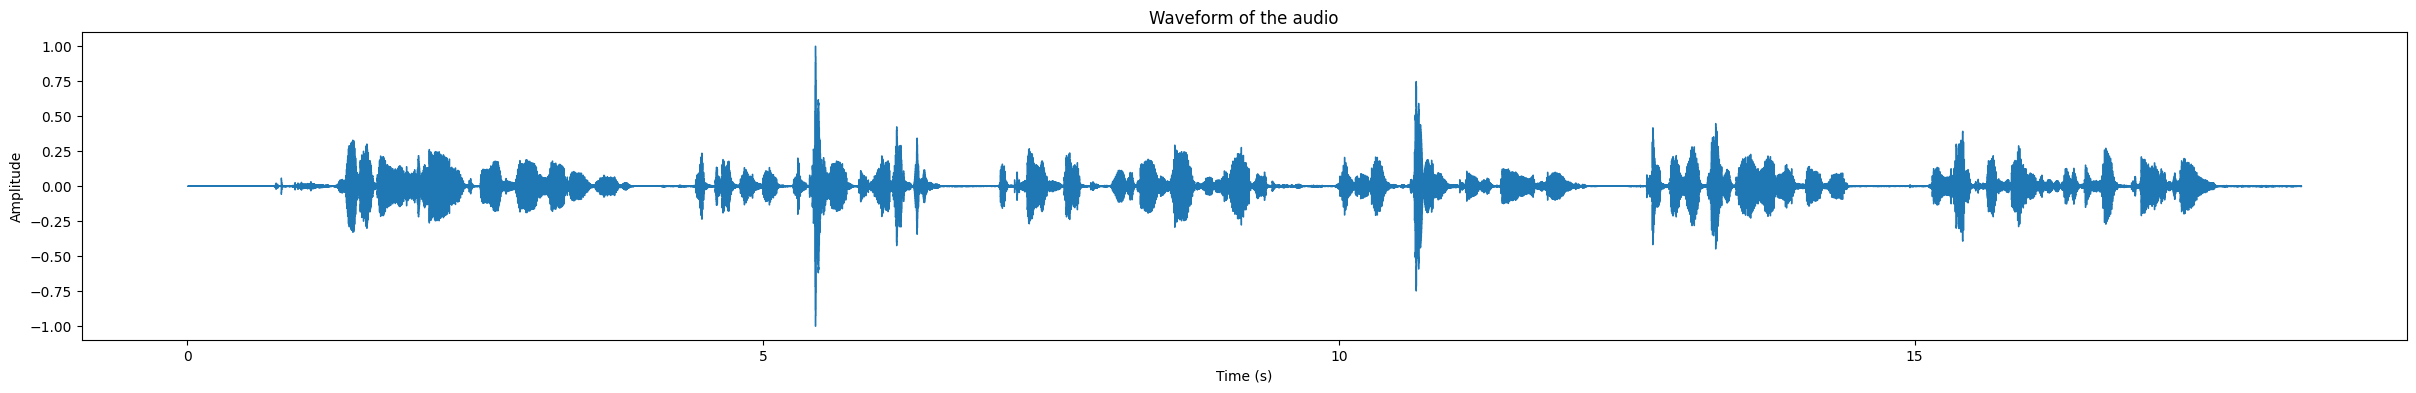

In [ ]:
import librosa
import matplotlib.pyplot as plt

# Load audio file
data, samplerate = librosa.load('/content/harvard.wav')

# Plot waveform
plt.figure(figsize=(30, 4))
librosa.display.waveshow(data, sr=samplerate)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform of the audio')
plt.show()


نشان دادن مقادیر کمینه و بیشینه داده های سیگنال صوتی

In [ ]:
print('Minimum data point value:', np.min(data)) #minimum range of signal
print('Maximum data point value:', np.max(data)) #maximum range of signal


Minimum data point value: -1.0006346
Maximum data point value: 0.6183622


Fourier Series:


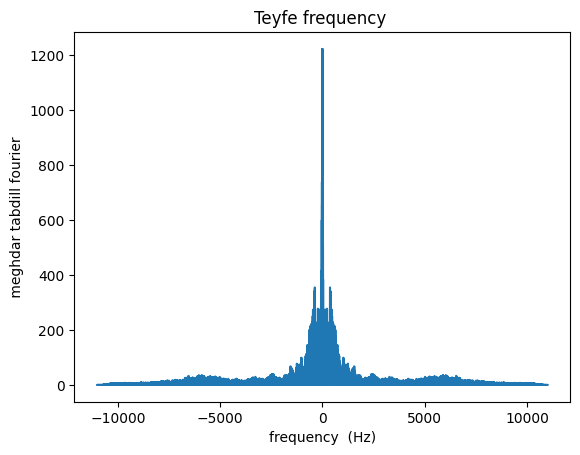

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# مسیر فایل صوتی
audio_file = '/content/harvard.wav'

# خواندن فایل صوتی
signal, sr = librosa.load(audio_file)

# محاسبه تبدیل فوریه
fft_result = np.abs(np.fft.fft(signal))

# تولید محور فرکانس
freq = np.fft.fftfreq(len(signal), 1 / sr)

# نمایش طیف فرکانسی
plt.plot(freq, fft_result)
plt.title('Teyfe frequency ')
plt.xlabel('frequency  (Hz)')
plt.ylabel(' meghdar tabdill fourier ')
plt.show()

In [ ]:
import librosa

audio_path = '/content/harvard.wav'

x , sr = librosa.load(audio_path)

print("Sample rate:",sr)
print("Duration of the signal in seconds: {:.2f}".format(len(x)/sr))

Sample rate: 22050
Duration of the signal in seconds: 18.36


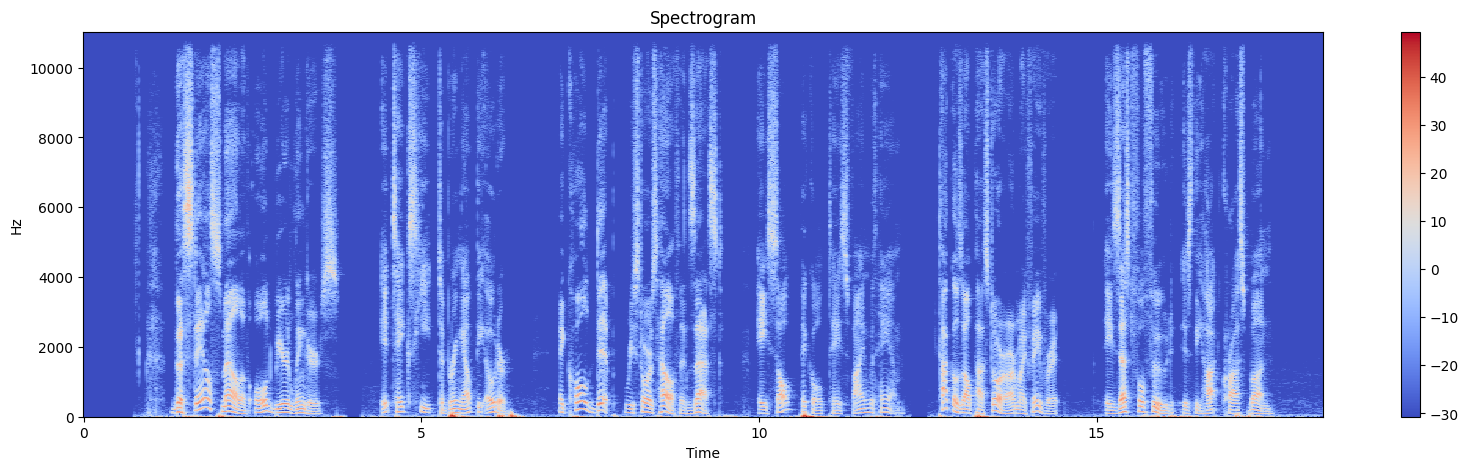

In [ ]:
# This is spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(20, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.title('Spectrogram')
plt.colorbar()

انواع نمایش های سیگنال صوت ورودی

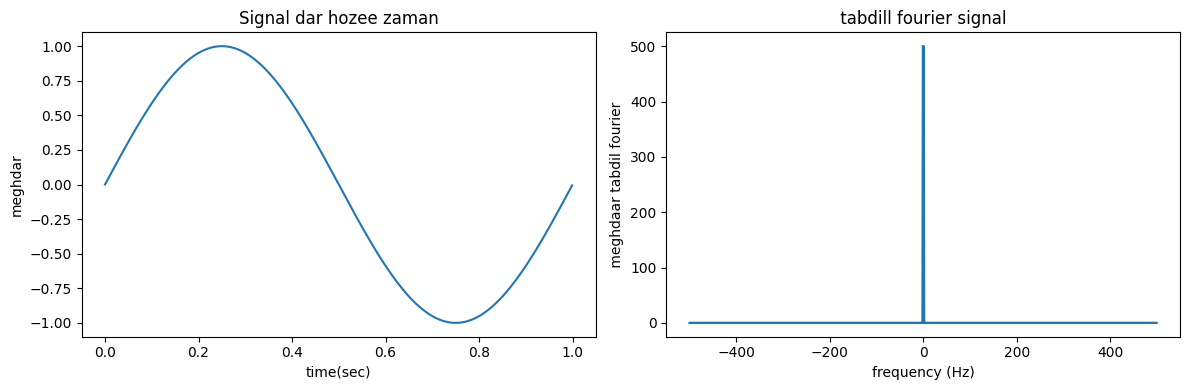

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# تنظیمات سیگنال
amplitude = 1.0  # بزرگی سیگنال
frequency = 1.0  # فرکانس سیگنال
duration = 1.0   # مدت زمان سیگنال

# تولید سیگنال دوره‌ای
num_samples = 1000  # تعداد نمونه‌ها
t = np.linspace(0, duration, num_samples, endpoint=False)  # بازه زمانی
signal = amplitude * np.sin(2 * np.pi * frequency * t)  # سیگنال دوره‌ای

# محاسبه تبدیل فوریه
fft_result = np.fft.fft(signal)

# نمایش سیگنال در حوزه زمان و فرکانس
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(t, signal)
plt.title('Signal dar hozee zaman')
plt.xlabel('time(sec)')
plt.ylabel('meghdar')

plt.subplot(1, 2, 2)
freq = np.fft.fftfreq(num_samples, 1 / num_samples)  # محور فرکانس
plt.plot(freq, np.abs(fft_result))
plt.title(' tabdill fourier signal ')
plt.xlabel('frequency (Hz)')
plt.ylabel(' meghdaar tabdil fourier ')

plt.tight_layout()
plt.show()

سیگنال مثلثی:

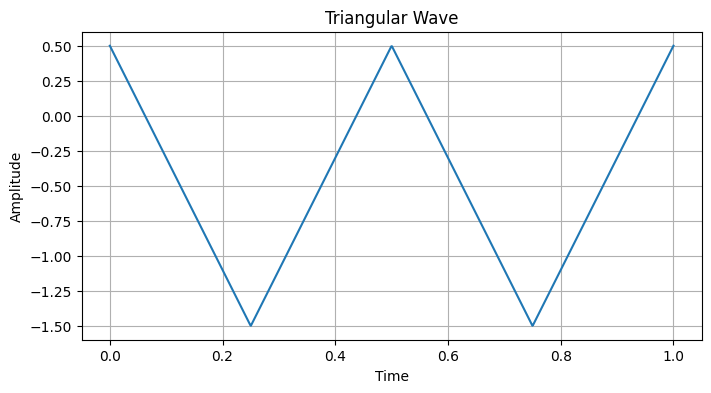

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def triangular_wave(t, amplitude, frequency, phase):
    x = amplitude * (1 - np.abs(4 * (t / (1 / frequency) - np.floor(0.5 + t / (1 / frequency))))) - amplitude / 2
    return x

# تعریف پارامترهای سیگنال
amplitude = 1.0  # دامنه سیگنال
frequency = 2.0  # فرکانس سیگنال
phase = 0.0  # فاز سیگنال

# تولید سیگنال مثلثی
t = np.linspace(0, 1, num=1000)  # محور زمان
x = triangular_wave(t, amplitude, frequency, phase)

# نمایش سیگنال در دامنه زمان
plt.figure(figsize=(8, 4))
plt.plot(t, x)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Triangular Wave')
plt.grid(True)
plt.show()

سیگنال مربعی

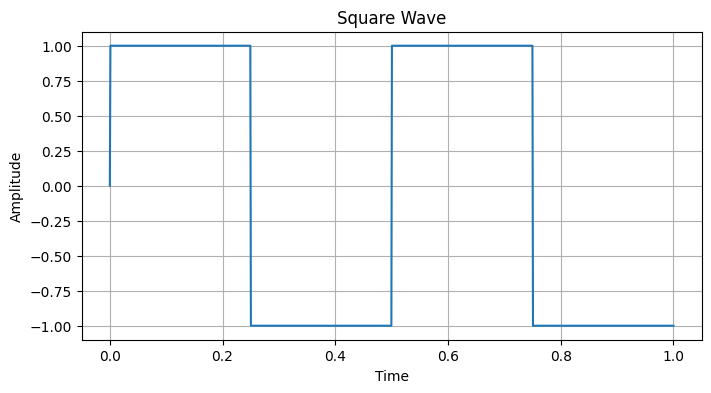

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def square_wave(t, amplitude, frequency, phase):
    x = amplitude * np.sign(np.sin(2 * np.pi * frequency * t + phase))
    return x

# تعریف پارامترهای سیگنال
amplitude = 1.0  # دامنه سیگنال
frequency = 2.0  # فرکانس سیگنال
phase = 0.0  # فاز سیگنال

# تولید سیگنال مربعی
t = np.linspace(0, 1, num=1000)  # محور زمان
x = square_wave(t, amplitude, frequency, phase)

# نمایش سیگنال در دامنه زمان
plt.figure(figsize=(8, 4))
plt.plot(t, x)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Square Wave')
plt.grid(True)
plt.show()


سیگنال سینوسی:


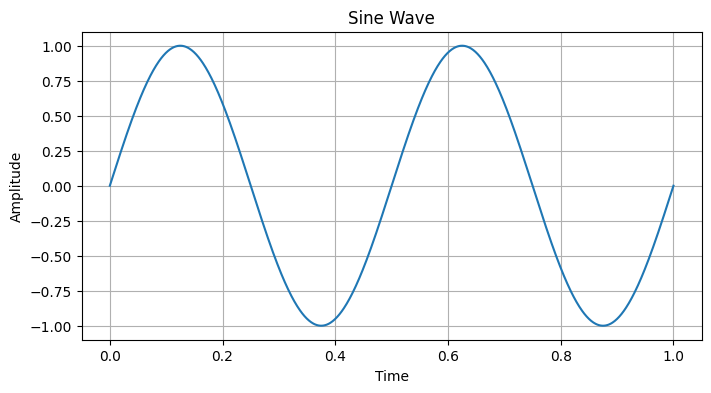

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sin_wave(t, amplitude, frequency, phase):
    x = amplitude * np.sin(2 * np.pi * frequency * t + phase)
    return x

# تعریف پارامترهای سیگنال
amplitude = 1.0  # دامنه سیگنال
frequency = 2.0  # فرکانس سیگنال
phase = 0.0  # فاز سیگنال

# تولید سیگنال سینوسی
t = np.linspace(0, 1, num=1000)  # محور زمان
x = sin_wave(t, amplitude, frequency, phase)

# نمایش سیگنال در دامنه زمان
plt.figure(figsize=(8, 4))
plt.plot(t, x)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sine Wave')
plt.grid(True)
plt.show()
